# A4-Q3: `MySpline`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## `MySpline`

In [2]:
def MySpline(x, y):
    '''
     S = MySpline(x, y)

     Input:
       x and y are arrays (or lists) of corresponding x- and y-values,
       specifying the points in the x-y plane.  The x-values
       must be in increasing order.

     Output:
       S is a function that takes x or an array (or list) of x-values
         It evaluates the cubic spline and returns the interpolated value.

     Implementation:
       
       Hence...
         a[0] = a_0          b[0] = b_1        c[0] = c_1
         a[1] = a_1          b[1] = b_2        c[1] = c_2
              :                   :                 :
         a[n-2] = a_(n-2)    b[n-2] = b_(n-1)  c[n-2] = c_(n-1)
         a[n-1] = a_(n-1)
         
       The polynomial piece is evaluated at xx using
       
         p_i(xx) = a[i]*(x[i+1]-xx)**3/(6*hi) + a[i+1]*(xx-x[i])**3/(6*hi) +
                   b[i]*(x[i+1]-xx) + c[i]*(xx-x[i])

       where hk = x[k+1] - x[k] for k = 0, ... , n-1
    '''
    n = len(x)
    h = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    a = np.zeros(n)
    
    M = np.zeros((n,n))
    r = np.zeros(n)

    
    # === YOUR CODE HERE ===
    # Goal: calculate a, b, c
    # h depends on input x
    for j in range(n-1):
        h[j] = x[j+1] - x[j]
    
    # M is the LHS matrix, r is the RHS vector, M @ a should be r
    # Since for natural BC, we know a_0 and a_(n-1) are 0
    #     to get this result, we can set M[0][0]=1, r[0]=1, and M[n-1][n-1]=0,r[n-1]=1
    M[0][0] = 1
    r[0] = 0
    M[n-1][n-1] = 1
    r[n-1] = 0
    
    # the rest of M depends on h, and r depends on y and h
    for i in range(n):
        if i == 0:
            M[i][i+1]=h[i]/6
            continue
        if i == n-1:
            M[i][i-1]=h[i-1]/6
            continue
        M[i][i-1]=h[i-1]/6
        M[i][i]=(h[i-1]+h[i])/3
        M[i][i+1]=h[i]/6
        r[i]=(y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]
    
    # calculate a based on equation M @ a = r
    a = np.linalg.solve(M, r)
    
    # calculate b and c based on a
    for k in range(n-1):
        b[k]=y[k]/h[k]-a[k]*h[k]/6
        c[k]=y[k+1]/h[k]-a[k+1]*h[k]/6
    
    #======================================
    #
    # This is the function that gets returned.
    # It evaluates the cubic spline at xvals.
    #
    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)
         
         Evaluates the cubic spline at xvals.
         
         Inputs:
          xvals can be list-like, or a scalar (**must be in ascending order**)
          
         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]
        
        S = []  # The return list of values
        
        # 
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]

        for xx in xvals:

            # If the next x-value is not on the current piece...
            if xx>x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k])**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)
        
        return S
    #======================================
    
    return spline

## Test `MySpline`

In [3]:
# Simple data points to interpolate
y = [1, 3, 4, 2, -1, 1]
t = [0, 1, 2, 3,  4, 5]

In [4]:
# Call the function
sp = MySpline(t,y)

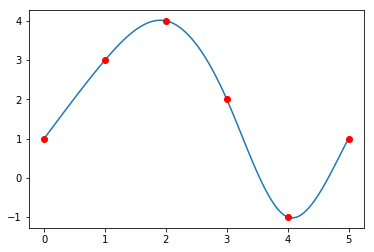

In [5]:
# Plot the spline and the interpolation points
xx = np.linspace(t[0], t[-1], 100)
plt.plot(xx, sp(xx))
plt.plot(t,y,'ro');